# 1. 동 단위 폴리곤 정보

동작구를 열라 쪼개보자.

In [0]:
#! pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [0]:
SiGunGu = gpd.read_file('/content/drive/My Drive/Colab Notebooks/data/공모전/동작구_공모전/EMD_201905.shp')

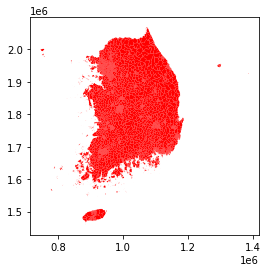

In [7]:
SiGunGu.plot(color='red')
plt.show()

In [0]:
SiGunGu['EMD_CD']=SiGunGu['EMD_CD'].astype(int)
DongJack=SiGunGu[SiGunGu['EMD_CD'].isin([i for i in range(11590101,11590110)])]

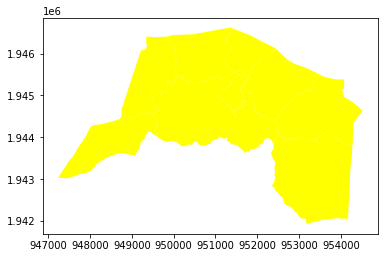

In [43]:
SiGunGu[SiGunGu['EMD_CD'].isin([i for i in range(11590101,11590110)])].plot(color='yellow')
plt.show()

Polygon Number

In [99]:
DongJack

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
409,11590101,Noryangjin-dong,³ë·®Áøµ¿,"POLYGON ((951386.621 1946611.519, 951396.786 1..."
410,11590102,Sangdo-dong,»óµµµ¿,"MULTIPOLYGON (((951797.594 1945502.652, 951798..."
411,11590103,Sangdo 1(il)-dong,»óµµ1µ¿,"POLYGON ((951535.558 1945562.562, 951535.562 1..."
412,11590104,Bon-dong,º»µ¿,"POLYGON ((951414.806 1946601.185, 951415.040 1..."
413,11590105,Heukseok-dong,Èæ¼®µ¿,"POLYGON ((952444.058 1946115.502, 952445.444 1..."
414,11590106,Dongjak-dong,µ¿ÀÛµ¿,"POLYGON ((953516.485 1945486.143, 953518.745 1..."
415,11590107,Sadang-dong,»ç´çµ¿,"POLYGON ((952523.047 1944081.142, 952577.144 1..."
416,11590108,Daebang-dong,´ë¹æµ¿,"POLYGON ((949350.581 1946405.136, 949425.246 1..."
417,11590109,Sindaebang-dong,½Å´ë¹æµ¿,"POLYGON ((949497.636 1944553.249, 949504.961 1..."


In [98]:
# 상도 1동을 뺀 나머지 geometry 출력 3000여개 정도 상도 1동까지 포함하면 4000개까지는 나올 것으로 보인다.
for index, row in DongJack.drop(410).iterrows():
     for pt in list(row['geometry'].exterior.coords): 
        num+=1
        print(Point(pt))

POINT (951386.6214153571 1946611.519114947)
POINT (951396.7858744995 1946607.778604515)
POINT (951407.4791346185 1946603.848360564)
POINT (951414.806342474 1946601.185495464)
POINT (951380.6361696183 1946552.009587505)
POINT (951372.1062806894 1946539.934212988)
POINT (951362.316130217 1946525.647326376)
POINT (951357.4516258343 1946518.613680793)
POINT (951357.2604208488 1946488.375743737)
POINT (951337.5343459041 1946488.511251062)
POINT (951336.5594401254 1946487.329850167)
POINT (951328.5465683249 1946478.500547997)
POINT (951317.392218151 1946466.157180768)
POINT (951309.7085467976 1946457.577042297)
POINT (951301.2566912591 1946448.343214193)
POINT (951292.4888180627 1946438.518276895)
POINT (951292.690578338 1946438.298287861)
POINT (951288.433916996 1946433.729518968)
POINT (951288.0719082317 1946433.325585325)
POINT (951284.8832802727 1946429.968712655)
POINT (951284.4751201079 1946429.533035229)
POINT (951282.6834014631 1946427.387315917)
POINT (951282.1331368402 1946426.7334

상도 1동을 뺸 이유는 상도 1동은 Polygon이 아니라 MutilPolygon 형태로 되어있다.

In [100]:
DongJack

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
409,11590101,Noryangjin-dong,³ë·®Áøµ¿,"POLYGON ((951386.621 1946611.519, 951396.786 1..."
410,11590102,Sangdo-dong,»óµµµ¿,"MULTIPOLYGON (((951797.594 1945502.652, 951798..."
411,11590103,Sangdo 1(il)-dong,»óµµ1µ¿,"POLYGON ((951535.558 1945562.562, 951535.562 1..."
412,11590104,Bon-dong,º»µ¿,"POLYGON ((951414.806 1946601.185, 951415.040 1..."
413,11590105,Heukseok-dong,Èæ¼®µ¿,"POLYGON ((952444.058 1946115.502, 952445.444 1..."
414,11590106,Dongjak-dong,µ¿ÀÛµ¿,"POLYGON ((953516.485 1945486.143, 953518.745 1..."
415,11590107,Sadang-dong,»ç´çµ¿,"POLYGON ((952523.047 1944081.142, 952577.144 1..."
416,11590108,Daebang-dong,´ë¹æµ¿,"POLYGON ((949350.581 1946405.136, 949425.246 1..."
417,11590109,Sindaebang-dong,½Å´ë¹æµ¿,"POLYGON ((949497.636 1944553.249, 949504.961 1..."


In [103]:
# 상도 1동을 포함시켜 좌표 추출을 시키면 오류가 발생한다.
for index, row in DongJack.iterrows():
     for pt in list(row['geometry'].exterior.coords): 
        pass

AttributeError: ignored

이 오류를 해결하기 위해서는 MultiPolygon을 일반 Polygon으로 바꿔야 하지만 상도 1동의 MultiPolygon에 구멍이 있어서 이걸 매꿔주고 변환을 시켜야한다.. 근데 그 방법을 모르겠따.

---
- 대박 ! 해결방법을 찾았다. 멀티폴리곤을 분해해서 각각의 폴리곤의 좌표들을 뽑아주면 정상적으로 돌아간다.

In [122]:
for num in [0,1]:
  print(num)
  for i in list(DongJack.loc[410,'geometry'])[num].exterior.coords:
    print(i)
  

0
(951797.5941986335, 1945502.6524510074)
(951798.525534347, 1945501.6478830797)
(951800.8552088834, 1945499.1054675314)
(951785.8981518722, 1945455.9815085738)
(951784.8200222221, 1945452.863362783)
(951779.2971194478, 1945436.4606316756)
(951774.4413899109, 1945422.0236456338)
(951773.0440887337, 1945417.9075562563)
(951769.6009776756, 1945407.6475559913)
(951767.8721719634, 1945402.658542667)
(951745.8228349814, 1945338.7997496284)
(951723.5752043966, 1945275.8146846972)
(951723.464595236, 1945275.503384706)
(951727.5973894364, 1945268.3900866667)
(951734.4535126792, 1945259.4510253812)
(951734.4828431131, 1945259.1379844747)
(951735.0328258225, 1945253.7000593725)
(951734.9712177705, 1945248.1084313842)
(951734.2691007497, 1945245.2072132968)
(951732.5565146311, 1945243.2799934633)
(951718.6970353947, 1945227.7021345298)
(951714.863703764, 1945223.4120169575)
(951708.4678183255, 1945216.1985478275)
(951707.997355035, 1945215.701222761)
(951706.4888433323, 1945213.9908420949)
(95170

# 2. 구 단위 폴리곤 정보

In [0]:
Gu = gpd.read_file('/content/drive/My Drive/Colab Notebooks/data/공모전/동작구_공모전/SIG_201905.shp')

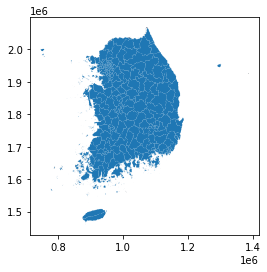

In [77]:
Gu.plot()

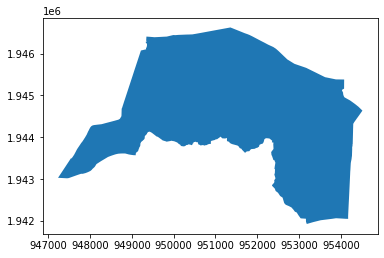

In [87]:
Gu[Gu['SIG_ENG_NM'].str.contains('Dongjak')].plot()

In [89]:
Dongjak=Gu[Gu['SIG_ENG_NM'].str.contains('Dongjak')]
Dongjak

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
19,11590,Dongjak-gu,µ¿ÀÛ±¸,"POLYGON ((951811.770 1946444.671, 951885.519 1..."


In [93]:
num=0
for index, row in Dongjak.iterrows():
     for pt in list(row['geometry'].exterior.coords): 
        num+=1
        print(Point(pt))
print(num)

POINT (951811.7695966399 1946444.670638391)
POINT (951885.5194509292 1946408.604935102)
POINT (951886.0469315866 1946407.977368953)
POINT (951927.6661186072 1946386.170754695)
POINT (951979.1759237382 1946359.126636544)
POINT (952039.1897004932 1946327.382169154)
POINT (952056.2287971198 1946318.389150488)
POINT (952067.9275598564 1946312.36035176)
POINT (952088.8463565677 1946301.5034529)
POINT (952107.2269460262 1946291.941533332)
POINT (952112.8333388873 1946289.006892965)
POINT (952115.8092129127 1946287.490675477)
POINT (952125.8257723708 1946282.439435535)
POINT (952138.8175450679 1946275.935958356)
POINT (952164.8477325733 1946262.864780866)
POINT (952180.3610743701 1946254.567596503)
POINT (952197.3065384737 1946245.44912279)
POINT (952236.976800733 1946224.278619776)
POINT (952260.8851437261 1946211.656526654)
POINT (952282.8543270733 1946201.511804214)
POINT (952293.1389358309 1946196.865996867)
POINT (952351.8350422833 1946170.189677177)
POINT (952382.9047785893 1946155.8732